In [7]:
import lightgbm as lgb
import hyperopt as hp
from numpy.random import RandomState
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams
config = {
"font.family": 'serif', # 衬线字体
"font.serif": ['SimSun'], # 宋体
"mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

In [4]:
train = pd.read_csv(filepath_or_buffer="../../Desktop/data/train1.csv",encoding="gbk")
train = pd.DataFrame(train)
#test = pd.read_csv(filepath_or_buffer="../../Desktop/recent/ImmuneTest.csv")
#test = pd.DataFrame(test)

In [74]:
train.columns

Index(['安徽.蚌埠', '安徽.合肥', '福建.福州', '福建.泉州', '广东.潮州', '广东.深圳', '河南.三门峡',
       '黑龙江.绥化', '湖北.武汉', '湖南.长沙', '江苏.连云港', '辽宁.大连', '山东.临沂', '陕西.西安',
       '上海.上海', '四川.成都', '香港.未知', '重庆.重庆', '日期', '是否是周末', '小时', '分钟', '秒',
       '所用时间', '来源', 'Q1.您的年龄', 'Q2.您的性别', 'Q3.A.完全不了解.', 'Q3.B.略有耳闻.',
       'Q3.C.一般了解.', 'Q3.D.非常了解.', 'Q4.A.传播速度快.', 'Q4.B.时效性强.', 'Q4.C.信息容量大.',
       'Q4.D.信息覆盖范围广.', 'Q4.E.高度开放性.', 'Q4.F.具有民族性和地域性.', 'Q4.G.跨地域性.',
       'Q5.您对.目前互联网文化是以青年为主的文化.的观点的认同程度..1.5打分.',
       'Q6.您对.高质量发展青年互联网文化.是其成为文化强国有机组成部分.的认同程度.',
       'Q7.您对.目前互联网文化仍需加强监管.的观点的认同程度..1.5打分.', 'Q8.您认为最有效的监管措施是.',
       'Q9.您主要的上网途径是.', 'Q10.A.学习.查资料.', 'Q10.B.刷视频.看剧.听音乐.', 'Q10.C.社交.',
       'Q10.D.玩游戏.', 'Q10.E.网购.', 'Q10.F.手机支付.', 'Q10.G.看小说.', 'Q10.H.炒股等理财.'],
      dtype='object')

In [77]:
ESR = 30
NBR = 10000
VBE = 100
evals_result = {}  # 记录训练结果所用
params = params_append(params)
kf = sk.model_selection.KFold(n_splits=3,
                              #random_state=2020,
                              shuffle=True)
label = [f for f in train.columns if f in ['Q6.您对.高质量发展青年互联网文化.是其成为文化强国有机组成部分.的认同程度.']]
features = [f for f in train.columns if f not in [ '小时', '分钟', '秒','Q6.您对.高质量发展青年互联网文化.是其成为文化强国有机组成部分.的认同程度.']]
for train_part_index,eval_index in kf.split(train[features],train[label]):
        eval = lgb.Dataset(train[features].loc[eval_index],train[label].loc[eval_index])
        train_part = lgb.Dataset(train[features].loc[train_part_index],train[label].loc[train_part_index])
        bst = lgb.train(params,train_part,num_boost_round=NBR,valid_sets=[train_part,eval],evals_result=evals_result,
                valid_names=['train','valid'],early_stopping_rounds=ESR,verbose_eval=VBE)

C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 39
[LightGBM] [Info] Start training from score 2.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[383]	train's rmse: 0.172782	valid's rmse: 0.671607
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 15, number of used features: 40
[LightGBM] [Info] Start training from score 1.800000
[LightGBM] [Warning] No further splits with posi

C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' 

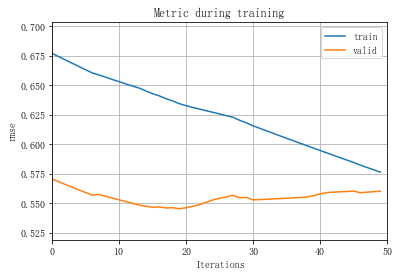

In [78]:
#plt.figure(figsize=(10,8),dpi=150)
ax = lgb.plot_metric(evals_result, metric='rmse')  # metric的值与之前的params里面的值对应
plt.savefig("您对.高质量发展青年互联网文化.是其成为文化强国有机组成部分.的认同程度.jpg", format="jpg",bbox_inches = 'tight', dpi=500)

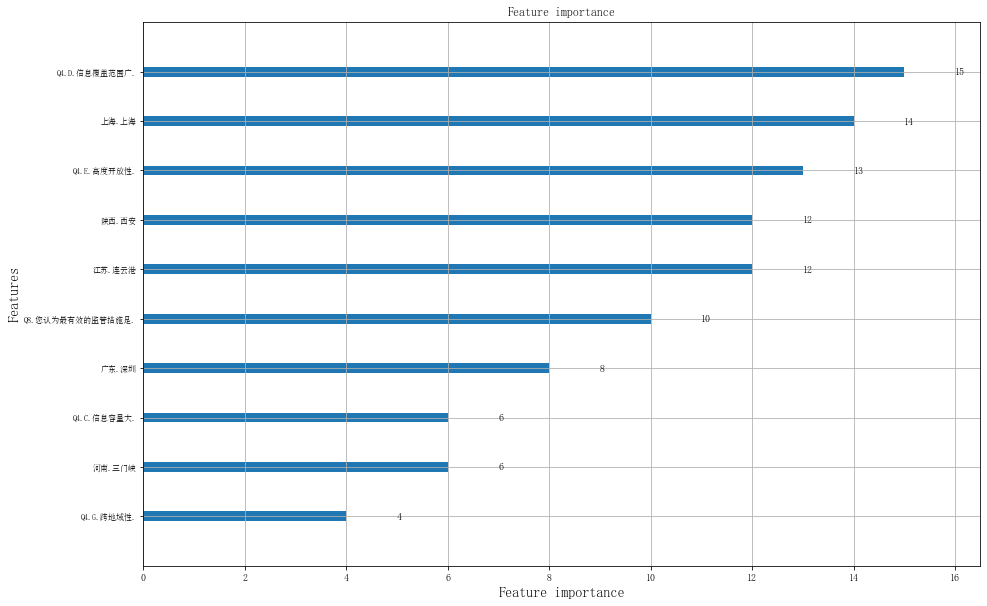

In [79]:
import matplotlib.pyplot as plt
#plt.rc("font",family='FangSong')
fig, ax = plt.subplots(figsize=(15,10))
lgb.plot_importance(bst, max_num_features=10, ax=ax)
plt.yticks(fontsize=8)
plt.xlabel('Feature importance',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.savefig("feature_importance_Q6.jpg", format="jpg",bbox_inches = 'tight', dpi=500)


importance = bst.feature_importance(importance_type='split')
feature_name = bst.feature_name()
# for (feature_name,importance) in zip(feature_name,importance):
#     print (feature_name,importance) 
feature_importance = pd.DataFrame({
  'feature_name':feature_name,'importance':importance} )
feature_importance.to_csv('feature_importance_Q6.csv',index=False)

In [78]:
MAX_ROUNDS = 500
val_pred = []
test_pred = []
label = [f for f in train.columns if f in ['户籍人口']]
features = [f for f in train.columns if f not in ['户籍人口']]

for i in range(1):
    
    print("====== Step %d ======" % (i+1))
    
    trainFeature = train[i:(i+5)]
    X_train = trainFeature
    y_train = train[(i+5):(i+10)][label]


    valFeature = train[(i+9):(i+10)]
    X_val = valFeature
    y_val = train[(i+9):(i+10)][label]
    
    testFeature = train[(i+10):(i+11)]
    X_test = testFeature
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val)
    
    bst = lgb.train(
            params, dtrain, num_boost_round=MAX_ROUNDS,
            valid_sets=[dtrain, dval], 
            verbose_eval=100)
    
    val_pred.append(bst.predict(X_val, num_iteration=bst.best_iteration or MAX_ROUNDS))
    test_pred.append(bst.predict(X_test, num_iteration=bst.best_iteration or MAX_ROUNDS))
    test_p = bst.predict(X_test)
    #df_train = np.append(train,test_p)

====== Step 1 ======
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 6
[LightGBM] [Info] Start training from score 107.431920
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [79]:
test_p

array([106.91870118])

In [67]:
def  params_append(params):
    params['objective'] = 'regression',
    params['metric'] = 'rmse',
    params['feature_pre_filter']=False
    #params['num_class']=6
    #params['is_unbalance']=True
    return params

In [75]:
def param_hyperopt(train):
    label = [f for f in train.columns if f in ['Q6.您对.高质量发展青年互联网文化.是其成为文化强国有机组成部分.的认同程度.']]
    features = [f for f in train.columns if f not in ['小时', '分钟', '秒','Q6.您对.高质量发展青年互联网文化.是其成为文化强国有机组成部分.的认同程度.']]
    train_data = lgb.Dataset(train[features],train[label],silent=True)
    def hyperopt_objective(params):
        params = params_append(params)
        print(params)
        res = lgb.cv(params,train_data,10000,nfold=3,stratified=False,shuffle=True,metrics='rmse',
                     early_stopping_rounds=30,
                     verbose_eval=False,show_stdv=False)
        return min(res['rmse-mean'])
        #return (1-max(res['multi_error-mean']))
    #参数空间
    
    params_space = {
        'learning_rate': hp.hp.uniform('learning_rate',1e-5,1e-2),
        'bagging_fraction': hp.hp.uniform('bagging_fraction',0.5,1),
        'feature_fraction': hp.hp.uniform('feature_fraction',0.5,1),
        'num_leaves': hp.hp.choice('num_leaves',list(range(2,50,2))),
        'reg_alpha': hp.hp.randint('reg_alpha',0,10),
        'reg_lambda': hp.hp.uniform('reg_lambda',0,10),
        'bagging_freq': hp.hp.randint('bagging_freq',1,10),
        'min_child_samples': hp.hp.choice('min_child_samples',list(range(2,30,2))),
        #'scale_pos_weight' : hp.hp.uniform('scale_pos_weight',1,20),
        'device' : 'gpu',
        'gpu_platform_id':1,
        'gpu_device_id':1
        
    }
    params_best = hp.fmin(
        hyperopt_objective,
        space=params_space,
        algo=hp.tpe.suggest,
        max_evals=100,
#         rstate=RandomState(2020)
    )
    return params_best

In [76]:
params = param_hyperopt(train)

{'bagging_fraction': 0.9686395407870263, 'bagging_freq': 6, 'device': 'gpu', 'feature_fraction': 0.5702117066739054, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.007458203181474936, 'min_child_samples': 26, 'num_leaves': 30, 'reg_alpha': 0, 'reg_lambda': 4.61256620838483, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs 

C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "

C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001629 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVID

C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.002597 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVID

[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001920 secs. 1 sparse feature groups       
{'bagging_fraction': 0.7965775525158205, 'bagging_freq': 3, 'device': 'gpu', 'feature_fraction': 0.6565673363193258, 'gpu_device_id': 1, 'gpu_platform_id': 1, '

[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001285 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kerne

[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001577 secs. 1 sparse feature groups       
{'bagging_fraction': 0.8661108672281217, 'bagging_freq': 7, 'device': 'gpu', 'feature_fraction': 0.7513213239173697, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.008968069281380844, 'min_child_samples': 20, 'num_leaves': 24, 'reg_alpha': 9, 'reg_lambda': 9.8735084

[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001552 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001506 secs. 1 sparse feature groups       
{'bagging_fraction': 0.638015875421127, 'bagging_freq': 3, 'device': 'gpu', 'feature_fraction': 0.691468577725735, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.0052047385053998075, 'min_child_samples': 8, 'num_leaves': 16, 'reg_alpha': 8, 'reg_lambda': 8.201563667860537, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GP

[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001910 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin 

[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001943 secs. 1 sparse feature groups       
{'bagging_fraction': 0.984237514389783, 'bagging_freq': 7, 'device': 'gpu', 'feature_fraction': 0.8184281565525979, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.004575118683381195, 'min_child_samples': 26, 'num_leaves': 40, 'reg_alpha': 4, 'reg_lambda': 9.504491649764194, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 11

[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001327 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature group

[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001931 secs. 1 sparse feature groups       
{'bagging_fraction': 0.7562710668089371, 'bagging_freq': 5, 'device': 'gpu', 'feature_fraction': 0.5016452649303704, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.005889302816650019, 'min_child_samples': 4, 'num_leaves': 30, 'reg_alpha': 0, 'reg_lambda': 7.832690968105311, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of dat

[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001781 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU traine

[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001728 secs. 1 sparse feature groups       
{'bagging_fraction': 0.8781235529100634, 'bagging_freq': 1, 'device': 'gpu', 'feature_fraction': 0.8882400285362877, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.008081936614157403, 'min_child_samples': 10, 'num_leaves': 8, 'reg_alpha': 0, 'reg_lambda': 5.753371334200852, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Dev

[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001478 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116        

[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.002024 secs. 1 sparse feature groups       
{'bagging_fraction': 0.9905141307682112, 'bagging_freq': 7, 'device': 'gpu', 'feature_fraction': 0.8527239770757112, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.0076988563697583815, 'min_child_samples': 6, 'num_leaves': 42, 'reg_alpha': 6, 'reg_lambda': 3.797049710420987, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling Op

[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001722 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points 

{'bagging_fraction': 0.8052574570747211, 'bagging_freq': 1, 'device': 'gpu', 'feature_fraction': 0.7356798119061208, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.006603410409417481, 'min_child_samples': 18, 'num_leaves': 2, 'reg_alpha': 5, 'reg_lambda': 0.7244205889543482, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.002216 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVID

[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001579 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU traine

[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001842 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin 

[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001641 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116        

[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001701 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature group

[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001540 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points 

[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001834 secs. 1 sparse feature groups       
{'bagging_fraction': 0.7370809657601365,

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001609 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVID

[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001912 secs. 1 sparse feature groups       
{'bagging_fraction': 0.6529012356492616, 'bagging_freq': 5, 'device': 'gpu', 'feature_fraction': 0.8786360888453703, 'gpu_device_id': 1, 'gpu_platform_id': 1, '

[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001708 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kerne

[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001947 secs. 1 sparse feature groups       
{'bagging_fraction': 0.9538655921705665, 'bagging_freq': 3, 'device': 'gpu', 'feature_fraction': 0.7550896408136829, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.007671514448345492, 'min_child_samples': 6, 'num_leaves': 30, 'reg_alpha': 0, 'reg_lambda': 3.34717221

[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001800 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001785 secs. 1 sparse feature groups       
{'bagging_fraction': 0.9200299321463097, 'bagging_freq': 2, 'device': 'gpu', 'feature_fraction': 0.8864056755520628, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.008572041112679254, 'min_child_samples': 6, 'num_leaves': 46, 'reg_alpha': 4, 'reg_lambda': 4.536503899662267, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the G

[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.002386 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin 

[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.002125 secs. 1 sparse feature groups       
{'bagging_fraction': 0.7901346728604148, 'bagging_freq': 9, 'device': 'gpu', 'feature_fraction': 0.6758025387768263, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.007919446644121841, 'min_child_samples': 6, 'num_leaves': 42, 'reg_alpha': 8, 'reg_lambda': 3.6665118235950165, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 1

[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.002339 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature group

[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001489 secs. 1 sparse feature groups       
{'bagging_fraction': 0.995593885420663, 'bagging_freq': 5, 'device': 'gpu', 'feature_fraction': 0.9357568001545761, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.005736982563398524, 'min_child_samples': 6, 'num_leaves': 28, 'reg_alpha': 0, 'reg_lambda': 7.279760155687339, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data

[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.003603 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU traine

[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001965 secs. 1 sparse feature groups       
{'bagging_fraction': 0.598522719739598, 'bagging_freq': 5, 'device': 'gpu', 'feature_fraction': 0.9117961223712437, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.0037496501243542016, 'min_child_samples': 8, 'num_leaves': 26, 'reg_alpha': 5, 'reg_lambda': 7.5129548165190325, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU De

[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.001964 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116        

[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.002236 secs. 1 sparse feature groups       
{'bagging_fraction': 0.661351932109291, 'bagging_freq': 5, 'device': 'gpu', 'feature_fraction': 0.9406529466149126, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.0030435985920746777, 'min_child_samples': 16, 'num_leaves': 8, 'reg_alpha': 2, 'reg_lambda': 0.4696465072723779, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling Op

[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.002229 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points 

{'bagging_fraction': 0.8486671084359679, 'bagging_freq': 3, 'device': 'gpu', 'feature_fraction': 0.8747448934599309, 'gpu_device_id': 1, 'gpu_platform_id': 1, 'learning_rate': 0.002664927299120431, 'min_child_samples': 6, 'num_leaves': 2, 'reg_alpha': 4, 'reg_lambda': 5.934863477040347, 'objective': ('regression',), 'metric': ('rmse',), 'feature_pre_filter': False}
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs h

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation                     
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...                                                              
[LightGBM] [Info] GPU programs have been built                                                                         
[LightGBM] [Info] Size of histogram bin entry: 8                                                                       
[LightGBM] [Info] 16 dense feature groups (0.00 MB) transferred to GPU in 0.002141 secs. 1 sparse feature groups       
[LightGBM] [Info] This is the GPU trainer!!                                                                            
[LightGBM] [Info] Total Bins 116                                                                                       
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 47                              
[LightGBM] [Info] Using GPU Device: NVID

In [45]:
def train_predict(train,test,params):
    label = 'TumorOrNormal'
    features = [f for f in train.columns if f not in ['TumorOrNormal']]
    params = params_append(params)
    kf = sk.model_selection.KFold(n_splits=5,random_state=2020,shuffle=True)
    prediction_test = 0
    cv_score = []
    prediction_train = pd.Series()
    ESR = 30
    NBR = 10000
    VBE = 50
    for train_part_index,eval_index in kf.split(train[features],train[label]):
        train_part = lgb.Dataset(train[features].loc[train_part_index],train[label].loc[train_part_index])
        eval = lgb.Dataset(train[features].loc[eval_index],train[label].loc[eval_index])
        bst = lgb.train(params,train_part,num_boost_round=NBR,valid_sets=[train_part,eval],
                        valid_names=['train','valid'],early_stopping_rounds=ESR,verbose_eval=VBE)
        prediction_test += bst.predict(test[features])
        prediction_train = prediction_train.append(pd.Series(
        bst.predict(train[features].loc[eval_index]), index=eval_index))
        eval_pre = bst.predict(train[features].loc[eval_index])
        score = np.sqrt(sk.metrics.mean_absolute_error(train[label].loc[eval_index].values,eval_pre))
        cv_score.append(score)
        print(cv_score,sum(cv_score))
        pd.Series(prediction_train.sort_index().values).to_csv(
        "../../Desktop/com result/train_lightgbm.csv",index = False)
        pd.Series(prediction_test).to_csv("../../Desktop/com result/test_lightgbm.csv",index=False)
        test['TumorOrNormal'] = prediction_test
        test[['TumorOrNormal']].to_csv("../../Desktop/com result/submission_lightgbm.csv",index=False)
        return

In [46]:
train_predict(train,test,params)

[LightGBM] [Info] Number of positive: 788, number of negative: 81
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4306
[LightGBM] [Info] Number of data points in the train set: 869, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.906789 -> initscore=2.275049
[LightGBM] [Info] Start training from score 2.275049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

C:\Users\86153\AppData\Local\Temp\ipykernel_1568\3298179350.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  prediction_train = pd.Series()
C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\86153\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in 

In [9]:
params
#LncRNA all loss:0.0009955399133204645

{'bagging_fraction': 0.5545163222455658,
 'bagging_freq': 2,
 'feature_fraction': 0.7264507118399341,
 'learning_rate': 0.027718553528183795,
 'min_child_samples': 5,
 'num_leaves': 132,
 'reg_alpha': 7,
 'reg_lambda': 3.2195131541752375}

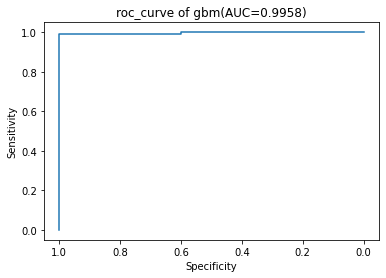

In [13]:
test_part = lgb.Dataset(test)
gbm_y_pre = pd.read_csv(filepath_or_buffer="../../Desktop/recent/testNew answer.csv")
gbm_y_proba = bst.predict(test[features]) # 分类的类别

import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve


gbm_auc = roc_auc_score(gbm_y_pre['x'], gbm_y_proba[:,])  # 计算auc
gbm_fpr, gbm_tpr, gbm_threasholds = roc_curve(gbm_y_pre['x'], gbm_y_proba[:,])  # 计算ROC的值
plt.title("roc_curve of %s(AUC=%.4f)" % ('gbm', gbm_auc))
plt.xlabel('Specificity')  # specificity = 1 - np.array(gbm_fpr))
plt.ylabel('Sensitivity')  # sensitivity = gbm_tpr
plt.plot(list(1 - np.array(gbm_fpr)), gbm_tpr)
plt.gca().invert_xaxis()  # 将X轴反转
plt.savefig("auc.jpg",format = "jpg",bbox_inches = 'tight', dpi=500)

Plotting split value histogram...


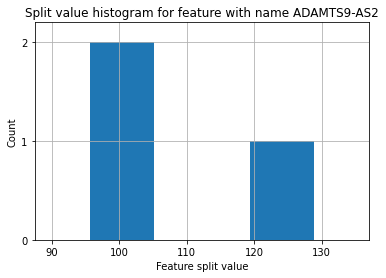

In [14]:
print('Plotting split value histogram...')
ax = lgb.plot_split_value_histogram(bst,feature='ADAMTS9-AS2', bins='auto')
plt.savefig("training histogramTumorOrNormal_ADAMTS9-AS2.jpg", format="jpg",bbox_inches = 'tight', dpi=500)

Plotting 4th tree...


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

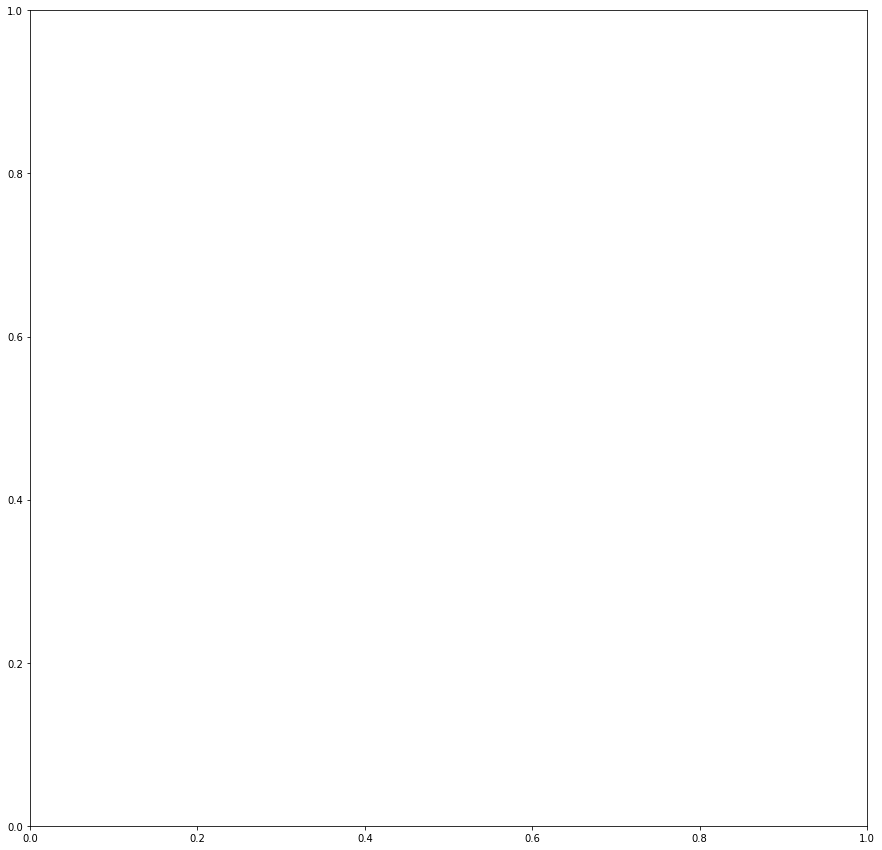

In [12]:
print('Plotting 4th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(bst, tree_index=4, figsize=(15, 15), show_info=['split_gain'])
plt.savefig("training tree.png", format="png")

In [3]:
params = {'bagging_fraction': 0.5508139325442933,
 'bagging_freq': 1,
 'feature_fraction': 0.8719686448263485,
 'learning_rate': 0.006743668710798017,
 'min_child_samples': 2,
 'num_leaves': 17,
 'reg_alpha': 0,
 'reg_lambda': 7.304874591640652}
#lncRNA all immune loss: 0.04611817398018202

In [63]:
params = {'bagging_fraction': 0.8566159041991672,
 'bagging_freq': 5,
 'feature_fraction': 0.6902047188337582,
 'learning_rate': 0.009462027923488296,
 'min_child_samples': 0,
 'num_leaves': 2,
 'reg_alpha': 1,
 'reg_lambda': 0.3608321566845435,
 'objective': ('regression',),
 'metric': ('rmse',),
 'feature_pre_filter': False}